In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [31]:
train_data = pd.read_csv(r'D:\New Python\Titanic-Dataset.csv')
test_data = pd.read_csv(r'D:\New Python\Titanic-Dataset.csv')

In [32]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

In [33]:
imputer = SimpleImputer(strategy='median')
train_data['Age'] = imputer.fit_transform(train_data[['Age']])
test_data['Age'] = imputer.transform(test_data[['Age']])

In [34]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

In [35]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

In [36]:
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [37]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
print('Accuracy:', accuracy_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Accuracy: 0.8268156424581006


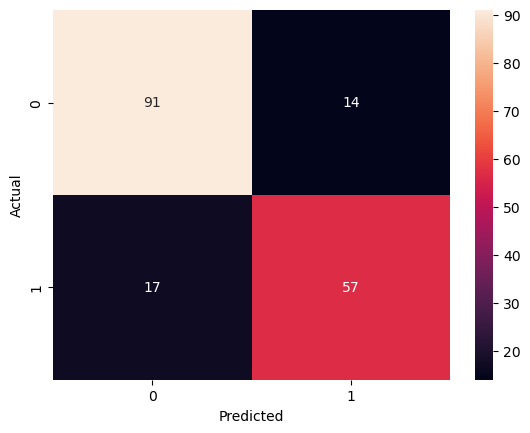

In [41]:
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [42]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

      Feature  Importance
6    Sex_male    0.269929
4        Fare    0.263467
1         Age    0.244759
0      Pclass    0.085796
5  FamilySize    0.052449
2       SibSp    0.031375
3       Parch    0.022035
8  Embarked_S    0.021867
7  Embarked_Q    0.008322


In [43]:
survival_counts = train_data['Survived'].value_counts()

In [44]:
print(f"Number of passengers who did not survive: {survival_counts[0]}")
print(f"Number of passengers who survived: {survival_counts[1]}")

Number of passengers who did not survive: 549
Number of passengers who survived: 342


In [45]:
print("\nSurvival Counts:")
print(survival_counts)


Survival Counts:
Survived
0    549
1    342
Name: count, dtype: int64


<Axes: xlabel='Survived'>

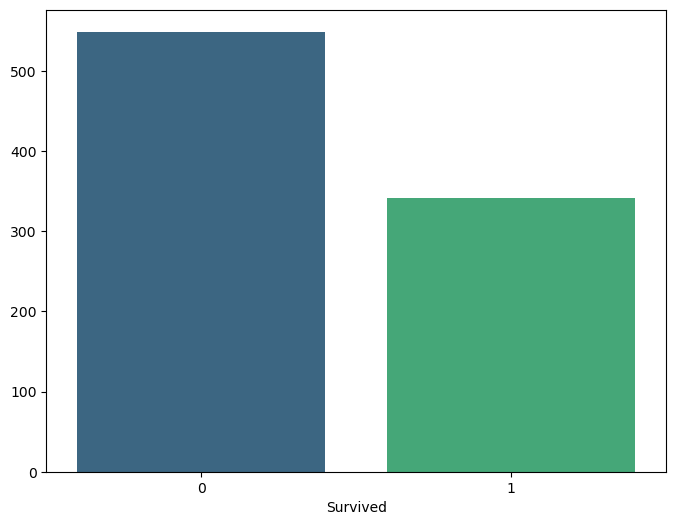

In [49]:
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_counts.index, y=survival_counts.values, palette='viridis')

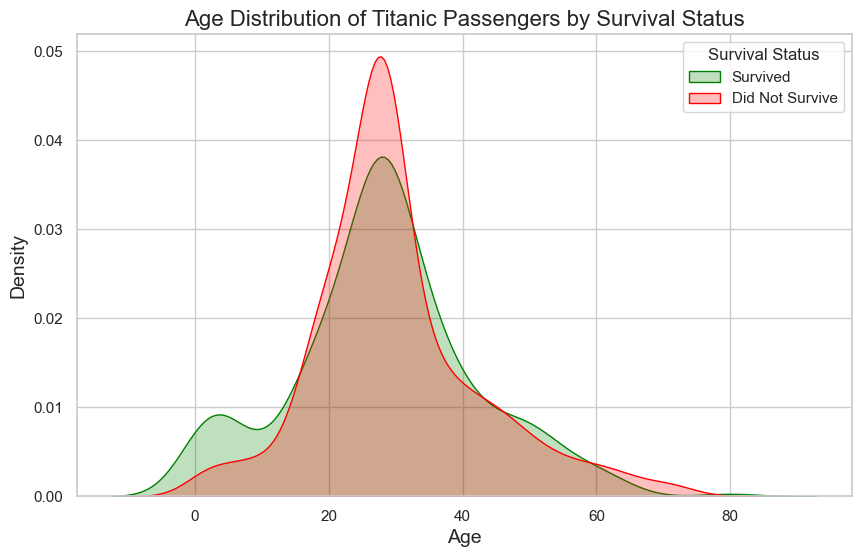

In [54]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=train_data[train_data['Survived'] == 1]['Age'], label='Survived', fill=True, color='green')
sns.kdeplot(data=train_data[train_data['Survived'] == 0]['Age'], label='Did Not Survive', fill=True, color='red')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Age Distribution of Titanic Passengers by Survival Status', fontsize=16)
plt.legend(title='Survival Status')
plt.show()
